# Princle Component Analysis


題材: 参考書（東京大学のデータサイエンス育成講座）の9章

In [84]:
# 必要パッケージのインポートと不思議なおまじない

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import sklearn as sl
import pandas as pd
import seaborn as sns

%matplotlib inline

## 人工データで試す

### データ作成

In [85]:
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T
print('head:', X[:10])
print('mean:', X.mean(axis=0))
print('var:', X.var(axis=0))

head: [[ 1.4827563   1.47449246]
 [-1.69277307 -1.47011947]
 [ 0.50402357  0.55942361]
 [-0.61089874 -0.49337321]
 [ 0.1435512   0.09030966]
 [ 0.15514589  0.19401324]
 [ 0.73000333  0.58276537]
 [ 1.02499603  1.04942968]
 [ 0.98004118  0.88718255]
 [-0.26680109 -0.18080268]]
mean: [-0.07048073 -0.04451659]
var: [0.81348176 0.67629658]


In [86]:
from sklearn.preprocessing import StandardScaler
sc = sl.preprocessing.StandardScaler()
X_std = sc.fit_transform(X)
print('head:', X_std[:10])
print('mean:', X_std.mean(axis=0))
print('var:', X_std.var(axis=0))

head: [[ 1.72212166  1.84710578]
 [-1.79868539 -1.73352443]
 [ 0.63697058  0.73438761]
 [-0.59917806 -0.54580692]
 [ 0.23730378  0.16394791]
 [ 0.25015917  0.29005083]
 [ 0.88752129  0.76277105]
 [ 1.21458877  1.33023202]
 [ 1.16474594  1.1329405 ]
 [-0.21766641 -0.16572305]]
mean: [-2.22044605e-18  3.55271368e-17]
var: [1. 1.]


### データ確認

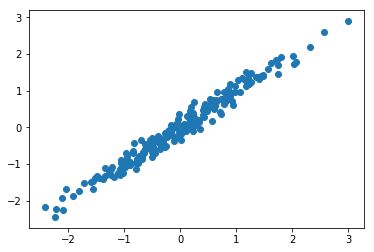

In [87]:
plt.scatter(X_std[:, 0], X_std[:, 1])

In [88]:
print('相関係数:', sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0])

相関係数: 0.9857488608320013


### 次元削減

In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [90]:
print('固有ベクトル:', pca.components_)
print('固有値（＝各主成分の分散）:', pca.explained_variance_)
print('寄与率:', pca.explained_variance_ratio_)

固有ベクトル: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
固有値（＝各主成分の分散）: [1.9957275  0.01432275]
寄与率: [0.99287443 0.00712557]


### 可視化

(-2.697724638739557,
 3.2732383787726733,
 -2.7334250152782054,
 3.1877509895610525)

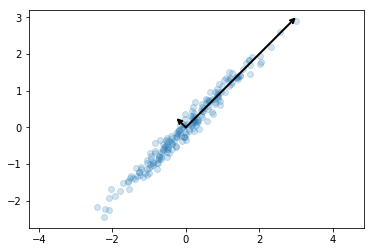

In [92]:
arrowprops = {'arrowstyle': '->', 'linewidth': 2, 'shrinkA': 0, 'shrinkB': 0}
def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)

for eigen_value, eigen_vector in zip(pca.explained_variance_, pca.components_):
    v = eigen_vector * 3 * np.sqrt(eigen_value)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')

## 実データで試す

### データのダウンロードと確認

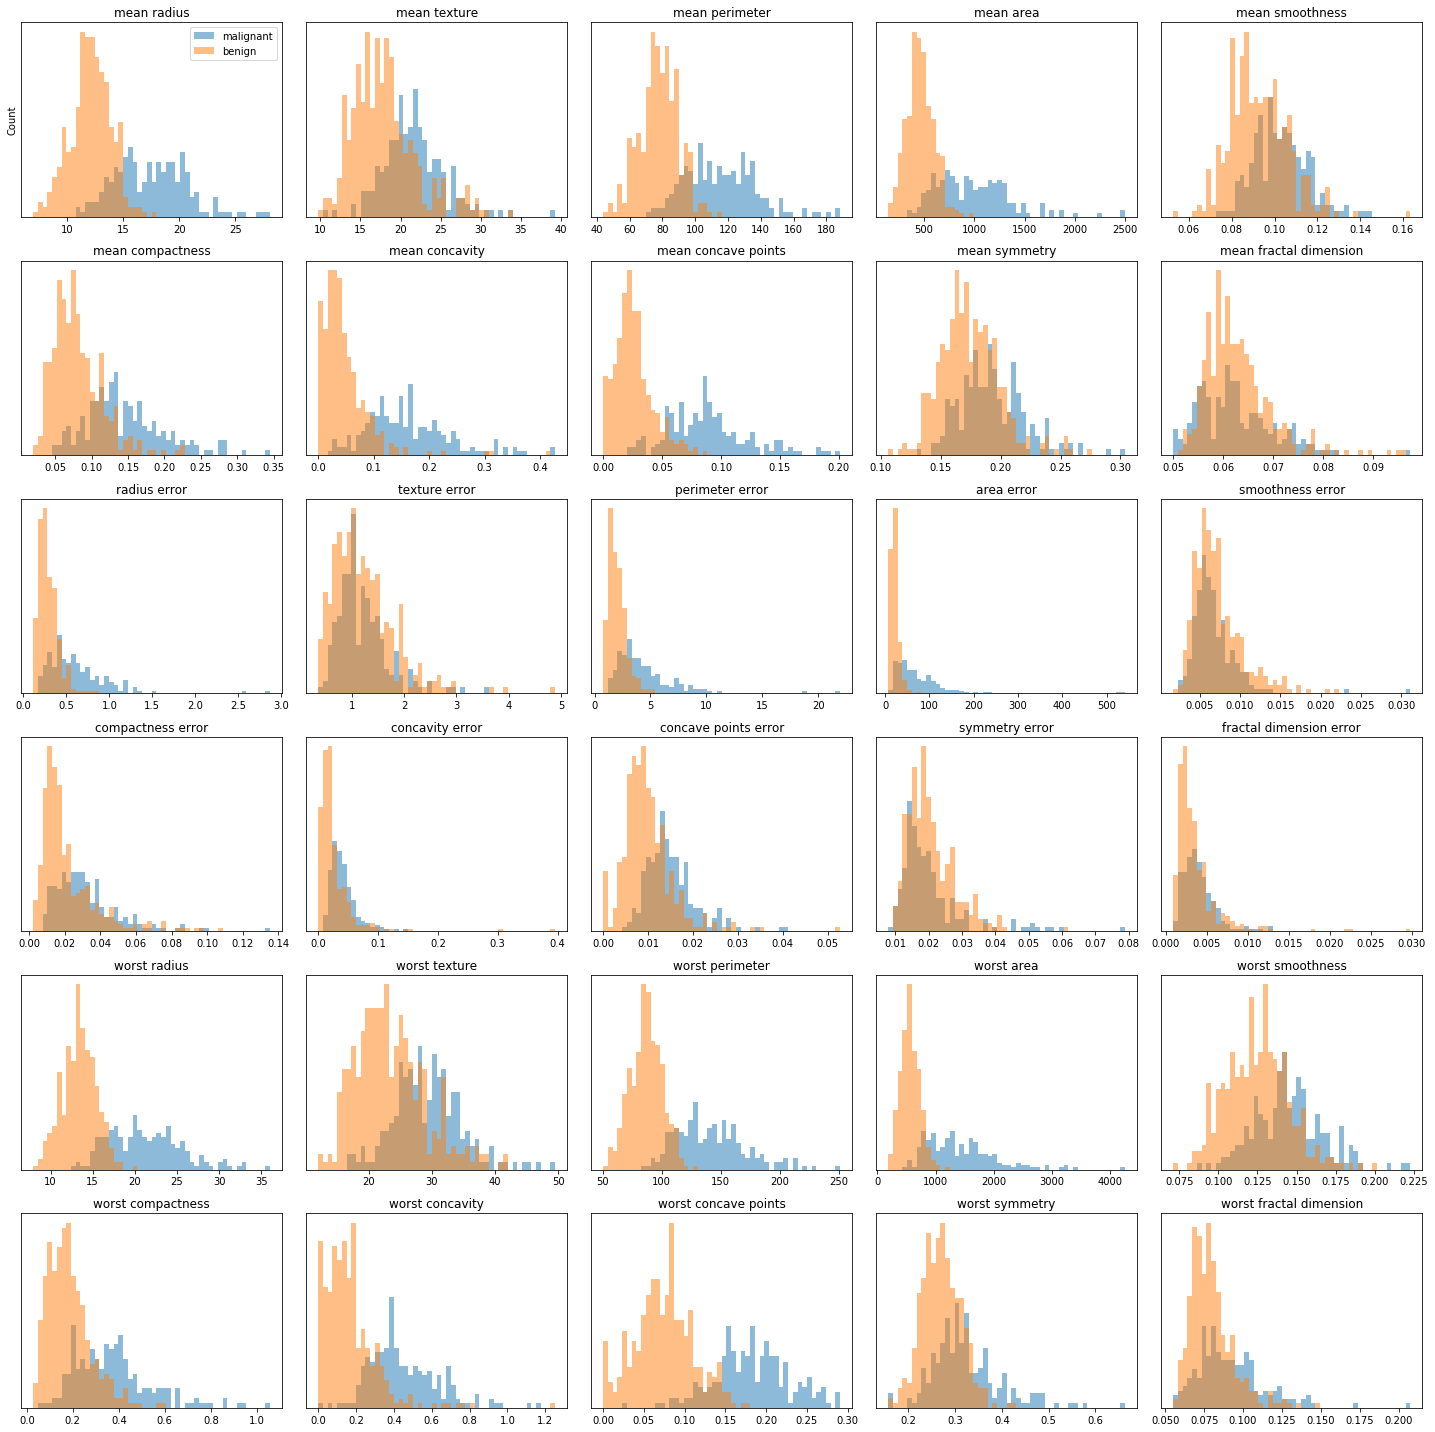

In [93]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
# 悪性
malignant = cancer.data[cancer.target == 0]
# 良性
benign = cancer.data[cancer.target == 1]

fig, axes = plt.subplots(6,5,figsize=(20,20))
ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins, alpha=.5)
    ax[i].hist(benign[:,i], bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
# ラベルの設定
ax[0].set_ylabel('Count')
ax[0].legend(['malignant','benign'],loc='best')
fig.tight_layout()

### 次元削減

In [94]:
# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

# 表示
print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ratio:{}'.format(pca.explained_variance_ratio_))

X_pca shape:(569, 2)
Explained variance ratio:[0.44272026 0.18971182]


### 可視化

In [95]:
X_pca = pd.DataFrame(X_pca, columns=['pc1', 'pc2'])
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)

X_pca.head()

,pc1,pc2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


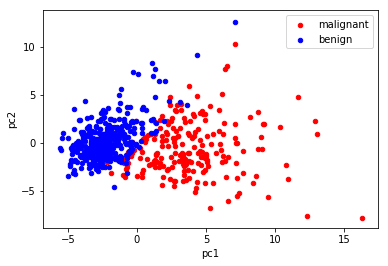

In [96]:
pca_malignant = X_pca[X_pca['target'] == 0]
pca_benign = X_pca[X_pca['target'] == 1]

ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant');
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax);